# Import Packages

In [ ]:
# Install Packages
import sys 
!{sys.executable} -m pip install matplotlib-venn 

In [ ]:
import os
from IPython.core.display import HTML

# Import pandas 
import numpy as np 
import pandas as pd

# Import time to measure how long processing takes
import time

# Import sklearn modules for model building
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, make_scorer

# Import the Snowball stemmer for stemming operations
from nltk.stem.snowball import SnowballStemmer

# Import regex for cleaning and other data processng
import re


import random
from collections import Counter

# Import matplotlib colors for color identification in queries
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import requests and json for search requests to google
import requests, json

# Import StringIO to handle the attributes file formatting errors on import
from io import StringIO

# Import Data

In [ ]:
# Vigi Desktop
# Import Train, Test, Product Descriptions and Attributes
# encoding="ISO-8859-1"
Train = pd.read_csv('C:/Users/SPashikanti/Downloads/HomeDepot Kaggle/Data/train.csv', encoding='latin-1')
Test = pd.read_csv('C:/Users/SPashikanti/Downloads/HomeDepot Kaggle/Data/test.csv', encoding='latin-1')
ProductDescriptions = pd.read_csv('C:/Users/SPashikanti/Downloads/HomeDepot Kaggle/Data/product_descriptions.csv', encoding='latin-1')
Attributes = pd.read_csv('C:/Users/SPashikanti/Downloads/HomeDepot Kaggle/Data/attributes.csv', encoding='latin-1')

FileNotFoundError: File b'C:/Users/SPashikanti/Downloads/HomeDepot Kaggle/Data/train.csv' does not exist

In [ ]:
# Dell Xps 
# Import Train, Test, Product Descriptions and Attributes
# encoding="ISO-8859-1"
Train = pd.read_csv('C:/Users/sandh/Google Drive/Data Science/Kaggle Projects/home-depot-product-search-relevance/Data/train.csv', encoding='latin-1')
Test = pd.read_csv('C:/Users/sandh/Google Drive/Data Science/Kaggle Projects/home-depot-product-search-relevance/Data/test.csv', encoding='latin-1')
ProductDescriptions = pd.read_csv('C:/Users/sandh/Google Drive/Data Science/Kaggle Projects/home-depot-product-search-relevance/Data/product_descriptions.csv', encoding='latin-1')
Attributes = pd.read_csv('C:/Users/sandh/Google Drive/Data Science/Kaggle Projects/home-depot-product-search-relevance/Data/attributes.csv', encoding='latin-1')

# Data Exploration

In [ ]:
# Function returns number of rows, columns; data types; Number of missing, unique values in each var;
# top observations; top unique values
def data_summary(df): 
    return print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns'), print(" "), print("DATA TYPES"), print (df.dtypes), print(" "), print("MISSING VALUES"), print(df.isnull().sum()) , print(" "), print("TOP OBSERVATIONS"), print (display(df.head(5))) , print(" ") , print("UNIQUE VALUES IN EACH VARIABLE"), print(df.apply(lambda x: [x.unique()])), print(" "), print("NUMBER OF UNIQUE VALUES IN EACH VARIABLE"), print(df.apply(lambda x: [len(x.unique())]))

In [ ]:
data_summary(Train)

This dataset has 74067 rows, and 5 columns
 
DATA TYPES
id                 int64
product_uid        int64
product_title     object
search_term       object
relevance        float64
dtype: object
 
MISSING DATA
id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64
 
TOP OBSERVATIONS


,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


None
 
UNIQUE VALUES IN EACH VARIABLE
id               [[2, 3, 9, 16, 17, 18, 20, 21, 23, 27, 34, 35,...
product_uid      [[100001, 100002, 100005, 100006, 100007, 1000...
product_title    [[Simpson Strong-Tie 12-Gauge Angle, BEHR Prem...
search_term      [[angle bracket, l bracket, deck over, rain sh...
relevance        [[3.0, 2.5, 2.33, 2.67, 2.0, 1.0, 1.67, 1.33, ...
dtype: object
 
NUMBER OF UNIQUE VALUES IN EACH VARIABLE
id               [74067]
product_uid      [54667]
product_title    [53489]
search_term      [11795]
relevance           [13]
dtype: object


(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

In [ ]:
data_summary(Test)

This dataset has 166693 rows, and 4 columns
 
DATA TYPES
id                int64
product_uid       int64
product_title    object
search_term      object
dtype: object
 
MISSING DATA
id               0
product_uid      0
product_title    0
search_term      0
dtype: int64
 
TOP OBSERVATIONS


,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


None
 
UNIQUE VALUES IN EACH VARIABLE
id               [[1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 19...
product_uid      [[100001, 100003, 100004, 100005, 100006, 1000...
product_title    [[Simpson Strong-Tie 12-Gauge Angle, STERLING ...
search_term      [[90 degree bracket, metal l brackets, simpson...
dtype: object
 
NUMBER OF UNIQUE VALUES IN EACH VARIABLE
id               [166693]
product_uid       [97460]
product_title     [94731]
search_term       [22427]
dtype: object


(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

In [ ]:
data_summary(ProductDescriptions)

This dataset has 124428 rows, and 2 columns
 
DATA TYPES
product_uid             int64
product_description    object
dtype: object
 
MISSING DATA
product_uid            0
product_description    0
dtype: int64
 
TOP OBSERVATIONS


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


None
 
UNIQUE VALUES IN EACH VARIABLE
product_uid            [[100001, 100002, 100003, 100004, 100005, 1000...
product_description    [[Not only do angles make joints stronger, the...
dtype: object
 
NUMBER OF UNIQUE VALUES IN EACH VARIABLE
product_uid            [124428]
product_description    [110128]
dtype: object


(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

In [ ]:
data_summary(Attributes)

This dataset has 2044803 rows, and 3 columns
 
DATA TYPES
product_uid    float64
name            object
value           object
dtype: object
 
MISSING DATA
product_uid     155
name            155
value          2284
dtype: int64
 
TOP OBSERVATIONS


,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90Â° connectio...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


None
 
UNIQUE VALUES IN EACH VARIABLE
product_uid    [[100001.0, 100002.0, 100003.0, 100004.0, 1000...
name           [[Bullet01, Bullet02, Bullet03, Bullet04, Bull...
value          [[Versatile connector for various 90Â° connect...
dtype: object
 
NUMBER OF UNIQUE VALUES IN EACH VARIABLE
product_uid     [86264]
name             [5411]
value          [307588]
dtype: object


(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

In [ ]:
# Extract missing data - few observations have missing data in all their columns or in values columns
# Implies when data is missing we can delete those rows
Attributes_missing = Attributes[Attributes['product_uid'].isnull() | Attributes['name'].isnull() | Attributes['value'].isnull()]
Attributes_missing

,product_uid,name,value
1022,100044.0,Collection Name,NaN
1349,100058.0,Battery Size,NaN
1929,NaN,NaN,NaN
4094,NaN,NaN,NaN
4100,NaN,NaN,NaN
5909,100248.0,Fastener Thread Type,NaN
6367,100266.0,Drive Style,NaN
6823,NaN,NaN,NaN
7898,100329.0,Fastener recommendation,NaN
7901,100329.0,MFG Brand Name,NaN


In [ ]:
# Extract only observations with no missing data
Attributes_NoMissing = Attributes[Attributes['value'].notnull()]
len(Attributes_NoMissing)

2042519

##### How many prodcut_ids are in Train, Test or both

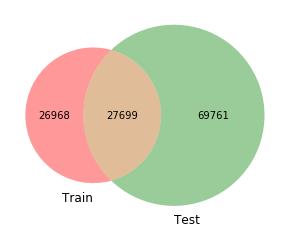

In [ ]:
from matplotlib_venn import venn2
venn2([set(Train["product_uid"]), set(Test["product_uid"])],set_labels=('Train', 'Test'))
plt.show()

In [ ]:
# Total distinct product ids of Train and Test 
ProductIDs_Train_Test = set(pd.unique(Train['product_uid'])).union(set(pd.unique(Test['product_uid'])))
len(ProductIDs_Train_Test)

# Check if all the IDs of Test_Train are present in ProductDescriptions - TRUE
ProductIDs_Both = ProductIDs_Train_Test.intersection(set(pd.unique(ProductDescriptions['product_uid'])))
len(ProductIDs_Both)

# All the Train & Test product_uid have product descriptions - So this variable can alos be used

124428

##### How many search_terms are in Train, Test or both

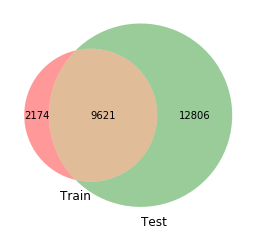

In [ ]:
from matplotlib_venn import venn2
venn2([set(Train["search_term"]), set(Test["search_term"])],set_labels=('Train', 'Test'))
plt.show()

##### Distribution of Relevance scores

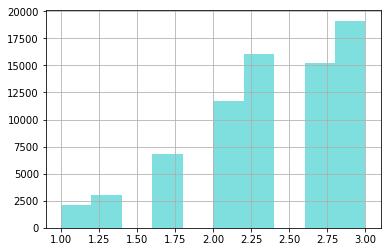

In [ ]:
Train.relevance.hist(color='c', alpha=0.5)
plt.show()

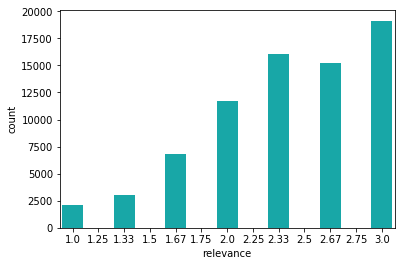

In [ ]:
sns.countplot(x="relevance", data=Train, color="c")
plt.show()

##### Attribute types

In [ ]:
# Frequency of different Attribute types - 5411 distinct attribute types
Attributes_NoMissing.name.value_counts().head(10)

Bullet02                86248
Bullet03                86226
MFG Brand Name          86185
Bullet04                86174
Bullet01                85940
Product Width (in.)     61137
Bullet05                60528
Product Height (in.)    54698
Product Depth (in.)     53652
Product Weight (lb.)    45175
Name: name, dtype: int64

# Data Pre-processing

#####  Spell checking

In [ ]:
def spell_check(text):
    for key in spell_check_dict:
        text = text.replace(key, spell_check_dict[key])
    return text

In [ ]:
Train['search_term'].map(lambda x:spell_check(str(x)))

NameError: name 'spell_check_dict' is not defined

In [ ]:
import requests
import re
import time
from random import randint

START_SPELL_CHECK="<span class=\"spell\">Showing results for</span>"
END_SPELL_CHECK="<br><span class=\"spell_orig\">Search instead for"

HTML_Codes = (
		("'", '&#39;'),
		('"', '&quot;'),
		('>', '&gt;'),
		('<', '&lt;'),
		('&', '&amp;'),
)

def spell_check(s):
	q = '+'.join(s.split())
	time.sleep(  randint(0,2) ) #relax and don't let google be angry
	r = requests.get("https://www.google.co.uk/search?q="+q)
	content = r.text
	start=content.find(START_SPELL_CHECK) 
	if ( start > -1 ):
		start = start + len(START_SPELL_CHECK)
		end=content.find(END_SPELL_CHECK)
		search= content[start:end]
		search = re.sub(r'<[^>]+>', '', search)
		for code in HTML_Codes:
			search = search.replace(code[1], code[0])
		search = search[1:]
	else:
		search = s
	return search ;


###samples
#searches = [ "metal plate cover gcfi", 'artric air portable", "roll roofing lap cemet", "basemetnt window", 
#            "vynal grip strip", "lawn mower- electic" ]
 
#for search in searches:
	#speel_check_search= spell_check(search)
	#print (search+"->" + speel_check_search)

In [ ]:
searches = [ "metal plate cver gcfi", "artric air portable", ]

In [ ]:
for search in searches:
	speel_check_search= spell_check(search)
	print (search+"->" + speel_check_search)

metal plate cver gcfi->metal plate cver gcfi
artric air portable->artric air portable


In [ ]:
spell_check("gas mowe")

'gas mowe'

In [ ]:
# Define the spelling correction function.
# This uses a pre-defined dictionary of spelling mistakes for improved efficiency.

def spell_check(text):
    for key in spell_check_dict:
        text = text.replace(key, spell_check_dict[key])
    return text

In [ ]:
# Run the spelling correction on the search term field in the training and testing set.
# Spelling correction is not performed on the description and attribute datasets as
# the assumption is made that the website contained correct spelling.
start_time = time.time()

Test['search_term'] = Test['search_term'].map(lambda x:spell_check(str(x)))
Train['search_term'] = Train['search_term'].map(lambda x:spell_check(str(x)))

print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'spell_check_dict' is not defined

In [ ]:
Train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [ ]:
#Import required packages and functions
import pandas as pd
import requests
import re
import time
from random import randint
import csv

#Read in search terms
Train_search_term = pd.read_csv('C:/Users/sandh/Google Drive/Data Science/Kaggle Projects/home-depot-product-search-relevance/Data/train.csv', header = 0, usecols = ['search_term'], encoding = "ISO-8859-1")

Test_search_term = pd.read_csv('C:/Users/sandh/Google Drive/Data Science/Kaggle Projects/home-depot-product-search-relevance/Data/test.csv', header = 0, usecols = ['search_term'], encoding = "ISO-8859-1")

#Concatenate train and test
search_term = pd.concat((Train_search_term, Test_search_term)).reset_index(drop=True)

#Drop duplicated search terms
search_term = search_term.drop_duplicates()

#Convert to list
search_term = search_term['search_term'].tolist()

In [ ]:
#Define the function
start_spell_check = "<span class=\"spell\">Showing results for</span>"
end_spell_check = "<br><span class=\"spell_orig\">Search instead for"

html_codes = (
		("'", '&#39;'),
		('"', '&quot;'),
		('>', '&gt;'),
		('<', '&lt;'),
		('&', '&amp;'),
)

html_codes = (
		("'", '&#39;'),
		('"', '&quot;'),
		('>', '&gt;'),
		('<', '&lt;'),
		('&', '&amp;'),
)

In [ ]:
def spell_check(s):
    #Takes a string as input and returns Google's corrected result
    q = '+'.join(s.split())
    time.sleep(  randint(2,5) ) #relax and don't let google be angry
    r = requests.get("https://www.google.co.uk/search?q="+q)
    content = r.text
    start = content.find(start_spell_check) 
    if (start > -1):
        start = start + len(start_spell_check)
        end=content.find(end_spell_check)
        search = content[start:end]
        search = re.sub(r'<[^>]+>', '', search)
        for code in html_codes:
            search = search.replace(code[1], code[0])
        correction = search[1:]
    else:
        correction = ""
    return correction

In [ ]:
html_codes

(("'", '&#39;'), ('"', '&quot;'), ('>', '&gt;'), ('<', '&lt;'), ('&', '&amp;'))

In [ ]:
spell_check("moweer")

''

In [ ]:
moweer.split()

NameError: name 'moweer' is not defined

In [ ]:
search_term = search_term[3:15]

In [ ]:
search_term

['rain shower head',
 'shower only faucet',
 'convection otr',
 'microwave over stove',
 'microwaves',
 'emergency light',
 'mdf 3/4',
 'steele stake',
 'briggs and stratton lawn mower',
 'gas mowe',
 'honda mower',
 'hampton bay chestnut pull up shade']

In [ ]:
#Loop through each unique search term and apply the above function
corrections = {}
for search in search_term:
    google_result = spell_check(search)
    if google_result != "":
        print(search + ": " + google_result)
        corrections[search] = google_result

In [ ]:
search_term

['rain shower head',
 'shower only faucet',
 'convection otr',
 'microwave over stove',
 'microwaves',
 'emergency light',
 'mdf 3/4',
 'steele stake',
 'briggs and stratton lawn mower',
 'gas mowe',
 'honda mower',
 'hampton bay chestnut pull up shade']

In [ ]:
import spell

ModuleNotFoundError: No module named 'spell'

In [ ]:

################ Spelling Corrector 

import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

FileNotFoundError: [Errno 2] No such file or directory: 'big.txt'

In [ ]:
#Save to CSV
with open('correction_playing.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['search_term_old','search_term_new'])
    for row in corrections.items():
        writer.writerow(row)